In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

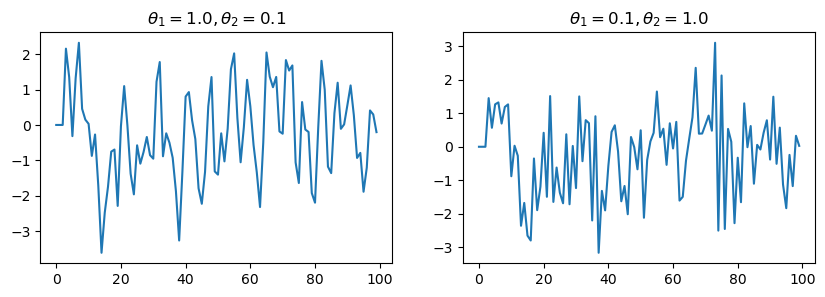

In [7]:
# MAモデルの例
theta1 = [1.0, 0.1]
theta2 = [0.1, 1.0]

np.random.seed(42)
eps = np.random.normal(0, 1, 100)
c = 0
x1 = np.zeros(100)
x2 = np.zeros(100)
for i in range(3, 100):
    x1[i] = c + eps[i] + theta1[0] * eps[i-1] + theta1[1] * eps[i-2]
    x2[i] = c + eps[i] + theta2[0] * eps[i-1] + theta2[1] * eps[i-2]
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.plot(x1)
plt.title(f'$\\theta_1={theta1[0]}, \\theta_2={theta1[1]}$')
plt.subplot(1, 2, 2)
plt.plot(x2)
plt.title(f'$\\theta_1={theta2[0]}, \\theta_2={theta2[1]}$')
plt.show()

In [23]:
df = pd.read_csv(os.path.join(os.getcwd(),'data','temperature.csv'), encoding='shift-jis', skiprows=3)
df.columns = ['datetime', 'temp']
df['datetime'] = pd.to_datetime(df['datetime'])

print(df.shape)
print(df['datetime'].min(), '\n-->', df['datetime'].max())
df.head()

(8784, 2)
2022-11-26 01:00:00 
--> 2023-11-27 00:00:00


,datetime,temp
0,2022-11-26 01:00:00,10.9
1,2022-11-26 02:00:00,10.9
2,2022-11-26 03:00:00,10.7
3,2022-11-26 04:00:00,10.7
4,2022-11-26 05:00:00,10.6


In [51]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['temp'], order=(1, 0, 1))  # AR次数, I次数, MA次数
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                   temp   No. Observations:                 8784
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -10826.150
Date:                Thu, 21 Dec 2023   AIC                          21660.300
Time:                        10:54:10   BIC                          21688.623
Sample:                             0   HQIC                         21669.950
                               - 8784                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.3195      1.632     10.610      0.000      14.120      20.519
ar.L1          0.9919      0.001    716.608      0.000       0.989       0.995
ma.L1          0.4545      0.006     72.151      0.0

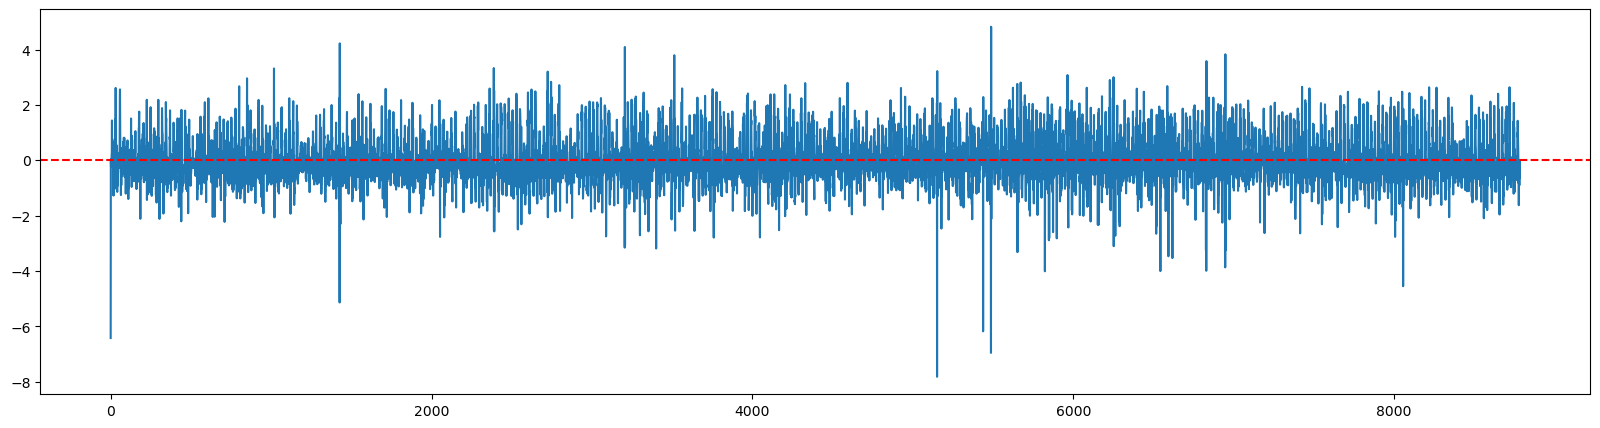

In [56]:
pred = result.predict()

# 残差のplot
plt.figure(figsize=(20,5))
plt.plot(result.resid)
plt.axhline(0, color='red', linestyle='--')
plt.show()

In [58]:
# R2 score
from sklearn.metrics import r2_score

print(r2_score(df['temp'], pred))

0.9922485835332968
